Decision Tree - Mean Accuracy: 0.940, Std Dev: 0.055


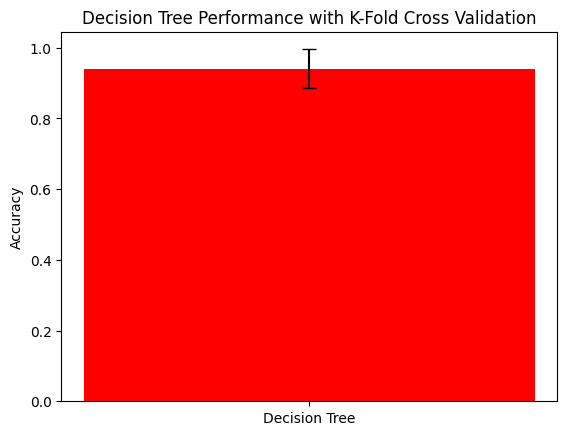

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load the dataset (Iris dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
data = pd.read_csv(url, names=columns)

# Prepare the input and output
X = data.iloc[:, :-1].values  # Features (all except 'Species')
Y = data.iloc[:, -1].values    # Target ('Species')

# Encode target labels to integers
Y = pd.factorize(Y)[0]  # Convert species names to integers

# Set up K-Fold Cross Validation (10 folds)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Evaluate Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree_cv_scores = cross_val_score(dtree, X, Y, cv=kfold, scoring='accuracy')

# Print the mean and standard deviation of the accuracy scores
print(f'Decision Tree - Mean Accuracy: {dtree_cv_scores.mean():.3f}, Std Dev: {dtree_cv_scores.std():.3f}')

# Visualize the results (mean accuracy with error bars)
plt.bar(['Decision Tree'], [dtree_cv_scores.mean()], yerr=[dtree_cv_scores.std()], capsize=5, color='red')
plt.title('Decision Tree Performance with K-Fold Cross Validation')
plt.ylabel('Accuracy')
plt.show()
